Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Loading Data

In [109]:
# write code here
data = pd.read_csv('mittrain.csv')
df = data.copy()
df.head()

,Firm,WC,Category
0,1,309.577,1
1,2,363.790,1
2,3,341.399,1
3,4,363.616,1
4,5,323.673,1


In [110]:
dftest = pd.read_csv('mittest.csv')
dftest.head()

,Firm,WC
0,1,367.325
1,2,347.513
2,3,330.226
3,4,178.106
4,5,378.899


In [3]:
df.dtypes

Firm          int64
WC          float64
Category      int64
dtype: object

### Create dependent and independent varaibles

In [111]:
# write code here
X = df.drop(['Category'], axis=1)
Y = df['Category']

In [112]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Category, dtype: int64

### Split the data into training and testing set and set the random state to 100

In [18]:
from sklearn.model_selection import train_test_split

In [52]:
# Write code here
xtrain ,xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.4, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(40, 2) (40,)
(28, 2) (28,)


##  Logistic Regression classifier

In [142]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=25)
lr_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [143]:
pred = lr_model.predict(dftest)

In [144]:
accuracy_lr = accuracy_score(Y,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

precision_lr = precision_score(Y,pred)
print("Precision by built-in function: {}".format(precision_lr))

recall_lr = recall_score(Y,pred)
print("Recall by built-in function: {}".format(recall_lr))

f1_lr=f1_score(Y,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

Accuracy by built-in function: 0.5882352941176471
Precision by built-in function: 0.5882352941176471
Recall by built-in function: 0.5882352941176471
F1 Score by built-in function: 0.5882352941176471


In [145]:
from sklearn.metrics import classification_report
print(classification_report(Y,pred)) 

              precision    recall  f1-score   support

           0       0.59      0.59      0.59        34
           1       0.59      0.59      0.59        34

    accuracy                           0.59        68
   macro avg       0.59      0.59      0.59        68
weighted avg       0.59      0.59      0.59        68



In [190]:
convert1=pd.DataFrame(pred.flatten())
convert1.to_csv('lgpred.csv', index=False)

C:\Users\haier pc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


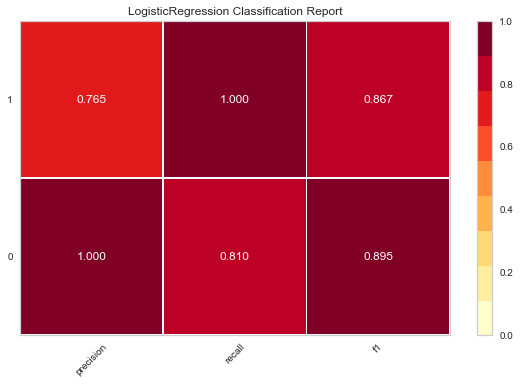

In [173]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
viz = ClassificationReport(LogisticRegression())
viz.fit(X, Y)
viz.score(dftest, predicted)
viz.show()

## Naive Bayes Classification

In [160]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [161]:
#Predict Output
predicted= model.predict(dftest) # 0:Overcast, 2:Mild
print("Predicted Value:", predicted)

Predicted Value: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [163]:
accuracy_nb = accuracy_score(Y,predicted)
print("Accuracy by Naive Bayes: {}".format(accuracy_nb))

precision_nb = precision_score(Y,predicted)
print("Precision by  Naive Bayes: {}".format(precision_nb))

recall_nb = recall_score(Y,predicted)
print("Recall by  Naive Bayes: {}".format(recall_nb))

f1_nb=f1_score(Y,predicted)
print("F1 Score by  Naive Bayes: {}".format(f1_nb))
 

Accuracy by Naive Bayes: 0.7058823529411765
Precision by  Naive Bayes: 0.7692307692307693
Recall by  Naive Bayes: 0.5882352941176471
F1 Score by  Naive Bayes: 0.6666666666666667


In [164]:
print(classification_report(Y,predicted)) 

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        34
           1       0.77      0.59      0.67        34

    accuracy                           0.71        68
   macro avg       0.72      0.71      0.70        68
weighted avg       0.72      0.71      0.70        68



In [193]:
convert1=pd.DataFrame(predicted.flatten())
convert1.to_csv('nbpred.csv', index=False)

C:\Users\haier pc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


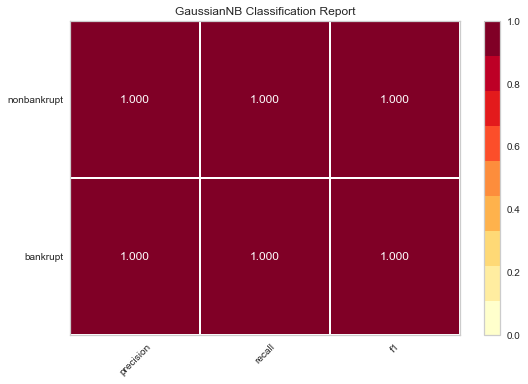

In [147]:
from yellowbrick.classifier import ClassificationReport
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
classes=['bankrupt','nonbankrupt']
visualizer=ClassificationReport(bayes,classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

C:\Users\haier pc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


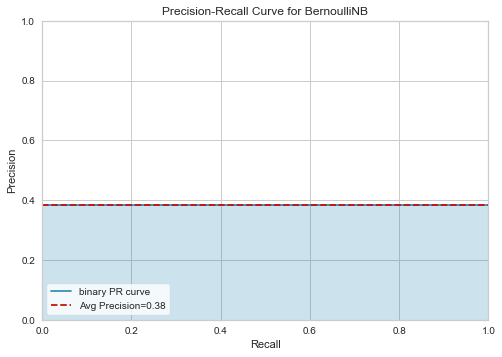

In [178]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import precision_recall_curve
from yellowbrick.datasets import load_spam

# Create the visualizer, fit, score, and show it
viz = precision_recall_curve(BernoulliNB(), X, Y, dftest, predicted)

## SVM Classification

In [195]:
#Import svm model
from sklearn import svm
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [196]:
#Predict the response for test dataset
y_pred = clf.predict(dftest)

In [197]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [198]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y, y_pred))
print("Accuracy:",metrics.precision_score(Y, y_pred))
print("Accuracy:",metrics.recall_score(Y, y_pred))

Accuracy: 0.5882352941176471
Accuracy: 0.5882352941176471
Accuracy: 0.5882352941176471


In [199]:
print("Precision:",metrics.precision_score(Y, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(Y, y_pred))

Precision: 0.5882352941176471
Recall: 0.5882352941176471


In [201]:
convert1=pd.DataFrame(y_pred.flatten())
convert1.to_csv('svmpred.csv', index=False)

C:\Users\haier pc\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\haier pc\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


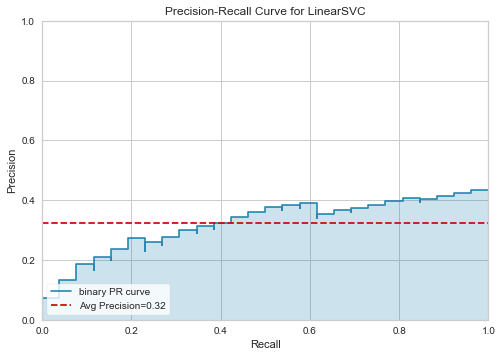

In [177]:
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
#X_train, X_test, y_train, y_test = train_test_split(X, y)
viz = PrecisionRecallCurve(LinearSVC())
viz.fit(X, Y)
viz.score(dftest, predicted)
viz.show()

## Binary Classification with Neural Networks

In [88]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
# load dataset
dataframe = read_csv("mittrain.csv", header=None)
dataset = dataframe.values
Xn = dataset[1:,0:2].astype(float)
Yn = dataset[1:,2]

In [96]:
def create_baseline():
    model = Sequential()
    model.add(Dense(2, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, Xn, Yn, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 47.14% (5.71%)


## Neural Network Predictions

In [152]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [157]:
history=model.fit(X, Y, epochs=20, batch_size=1)


Epoch 1/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.0619 - acc: 0.9706
Epoch 2/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.0933 - acc: 0.9706
Epoch 3/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.0346 - acc: 1.0000
Epoch 4/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.1007 - acc: 0.9559
Epoch 5/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.0917 - acc: 0.9559
Epoch 6/50
68/68 [==============================] - 0s 2ms/sample - loss: 1.7920 - acc: 0.7206
Epoch 7/50
68/68 [==============================] - 0s 2ms/sample - loss: 1.1539 - acc: 0.7206
Epoch 8/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.2193 - acc: 0.9118
Epoch 9/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.0667 - acc: 0.9706
Epoch 10/50
68/68 [==============================] - 0s 2ms/sample - loss: 0.0452 - acc: 1.0000
Epoch 11/50
68/68 [==============================

In [115]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

21/21 [==============================] - 0s 13ms/sample - loss: 0.1377 - acc: 1.0000
Test accuracy: 1.0


In [121]:
a= dftest.values
a

array([[1.000000e+00, 3.673250e+02],
       [2.000000e+00, 3.475130e+02],
       [3.000000e+00, 3.302260e+02],
       [4.000000e+00, 1.781060e+02],
       [5.000000e+00, 3.788990e+02],
       [6.000000e+00, 2.572120e+02],
       [7.000000e+00, 3.330880e+02],
       [8.000000e+00, 1.823240e+02],
       [9.000000e+00, 2.380990e+02],
       [1.000000e+01, 3.296430e+02],
       [1.100000e+01, 4.204066e+03],
       [1.200000e+01, 1.411733e+03],
       [1.300000e+01, 4.197206e+03],
       [1.400000e+01, 1.121866e+03],
       [1.500000e+01, 8.206830e+02],
       [1.600000e+01, 1.349887e+03],
       [1.700000e+01, 3.128736e+03],
       [1.800000e+01, 2.551433e+03],
       [1.900000e+01, 8.091150e+02],
       [2.000000e+01, 2.866623e+03],
       [2.100000e+01, 2.946440e+02],
       [2.200000e+01, 2.816660e+02],
       [2.300000e+01, 3.080860e+02],
       [2.400000e+01, 3.170790e+02],
       [2.500000e+01, 2.451390e+02],
       [2.600000e+01, 3.546620e+02],
       [2.700000e+01, 2.922560e+02],
 

In [123]:
Ypred=model.predict(a)

In [202]:
convert1=pd.DataFrame(Ypred.flatten())
convert1.to_csv('cnnpred.csv', index=False)